### Import Dataset

In [142]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits  = load_digits()

x = digits.data
y =  digits.target
print(x,y)
print(x.shape,y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]
(1797, 64) (1797,)


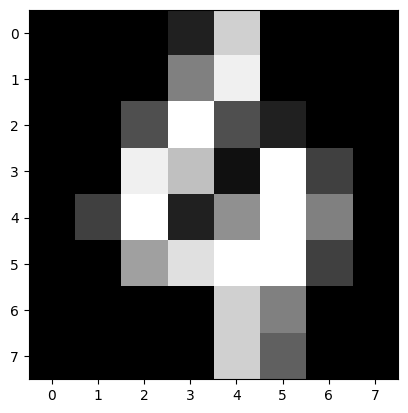

4


In [143]:
plt.gray()
plt.imshow(digits.images[100])
plt.show()
print(digits.target[100])

### Evaluate Model Function

In [144]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def calculate_model_metrics(model, x_train, x_test, y_train, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred, average="macro")
    precision_test = precision_score(y_test, y_test_pred, average="macro")
    recall_train = recall_score(y_train, y_train_pred, average="macro")
    recall_test = recall_score(y_test, y_test_pred, average="macro")

    print("accuracy_train  :", accuracy_train)
    print("accuracy_test   :", accuracy_test)
    print("precision_test  :", precision_test)
    print("recall_test     :", recall_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test

### Normalize Data

In [145]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
scalar.fit(x)
x = scalar.transform(x)
print(x)

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


### Train/Test Data

In [146]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x), len(x_train), len(x_test))

1797 1437 360


### PCA (Reduce Data Dimensions)
with this model you can reduce dimension of your inputs to make models faster & reduce overFitting

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32) # Reduce dimensions to 3
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train.shape, x_train_pca.shape)

(1437, 64) (1437, 32)


### KNN Model

accuracy_train  : 0.9902574808629089
accuracy_test   : 0.9805555555555555
precision_test  : 0.9834471489745324
recall_test     : 0.9781045261315328
target          : 4
predict         : [4]


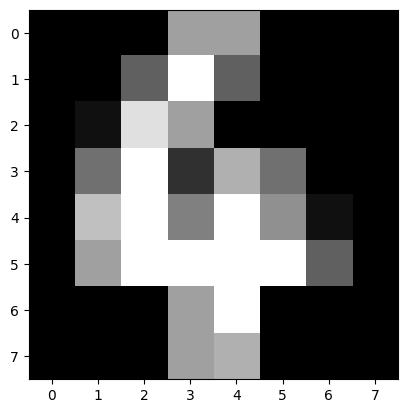

In [148]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
knn_acc_train, knn_acc_test, knn_p_train , knn_p_test , knn_r_train , knn_r_test = calculate_model_metrics(model, x_train, x_test, y_train, y_test)
 
test_idx = 19
test = x_test[test_idx].reshape(1, -1)
predict = model.predict(test)
print("target          :", y_test[test_idx])
print("predict         :", predict)

plt.gray()
plt.imshow(scalar.inverse_transform(test).reshape(8,8))
plt.show()

### KNN Model (PCA)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train_pca, y_train)
knn_acc_train_pca, knn_acc_test_pca, knn_p_train_pca , knn_p_test_pca , knn_r_train_pca , knn_r_test_pca = calculate_model_metrics(model, x_train_pca, x_test_pca, y_train, y_test)

accuracy_train  : 0.9909533750869868
accuracy_test   : 0.9805555555555555
precision_test  : 0.9834471489745324
recall_test     : 0.9781045261315328


### Random Forest Model

In [168]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
rf_acc_train, rf_acc_test, rf_p_train , rf_p_test , rf_r_train , rf_r_test = calculate_model_metrics(model, x_train, x_test, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9694444444444444
precision_test  : 0.9702987754711894
recall_test     : 0.9668942235558889


### Random Forest Model (PCA)

In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30)
model.fit(x_train_pca, y_train)
rf_acc_train_pca, rf_acc_test_pca, rf_p_train_pca , rf_p_test_pca , rf_r_train_pca , rf_r_test_pca = calculate_model_metrics(model, x_train_pca, x_test_pca, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9583333333333334
precision_test  : 0.9609194740658153
recall_test     : 0.9548827650928177


### SVM Model

In [152]:
from sklearn import svm

svm.SVC(kernel="poly")
model.fit(x_train, y_train)
svm_acc_train, svm_acc_test, svm_p_train , svm_p_test , svm_r_train , svm_r_test = calculate_model_metrics(model, x_train, x_test, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9694444444444444
precision_test  : 0.9702322064958105
recall_test     : 0.9675248541865195


### SVM Model (PCA)

In [153]:
from sklearn import svm

svm.SVC(kernel="poly")
model.fit(x_train_pca, y_train)
svm_acc_train_pca, svm_acc_test_pca, svm_p_train_pca , svm_p_test_pca , svm_r_train_pca , svm_r_test_pca = calculate_model_metrics(model, x_train_pca, x_test_pca, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9638888888888889
precision_test  : 0.9662613649612778
recall_test     : 0.9620006606381326


### ANN Model

In [170]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[40], max_iter=180, activation="relu", solver="adam", batch_size=64)
model.fit(x_train,y_train)
ann_acc_train, ann_acc_test, ann_p_train , ann_p_test , ann_r_train , ann_r_test = calculate_model_metrics(model, x_train, x_test, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9861111111111112
precision_test  : 0.987275659824047
recall_test     : 0.9851867696653892


/home/samans76/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(


### ANN Model (PCA)

In [171]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[40], max_iter=180, activation="relu", solver="adam", batch_size=64)
model.fit(x_train_pca,y_train)
ann_acc_train_pca, ann_acc_test_pca, ann_p_train_pca, ann_p_test_pca, ann_r_train_pca, ann_r_test_pca = calculate_model_metrics(model, x_train_pca, x_test_pca, y_train, y_test)

accuracy_train  : 1.0
accuracy_test   : 0.9805555555555555
precision_test  : 0.9801020408163266
recall_test     : 0.9775323295109493


### Comparison

Text(0, 0.5, 'Accuracy')

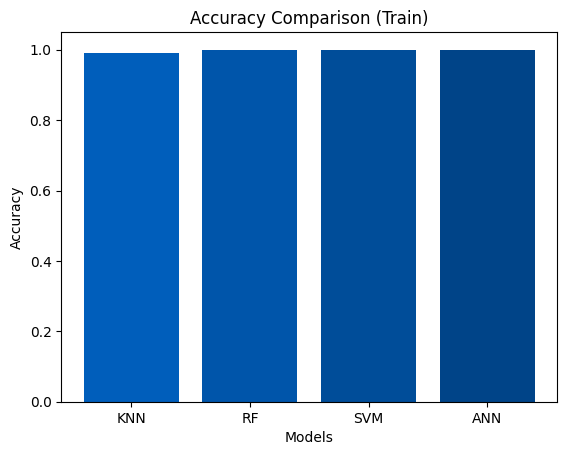

In [156]:
titles = ["KNN", "RF", "SVM", "ANN"]
colors = ["#005EBB", "#0055AA", "#004D99", "#004488"]

acc_train = [knn_acc_train, rf_acc_train, svm_acc_train, ann_acc_train]
plt.bar(titles, acc_train, color=colors)
plt.title('Accuracy Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

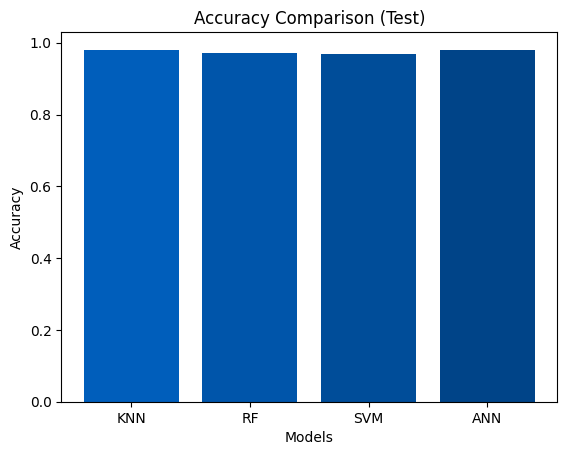

In [157]:
acc_test = [knn_acc_test, rf_acc_test, svm_acc_test, ann_acc_test]
plt.bar(titles, acc_test, color=colors)
plt.title('Accuracy Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

### Comparison Between Normal and PCA (reduced data dimensions)
as you can see pca makes models a little faster. changes accuracy a little (usually decreases it but sometimes increases it) <br>
this decision was made because there are lots of useless data (black pixels) in pictures

Text(0, 0.5, 'Accuracy')

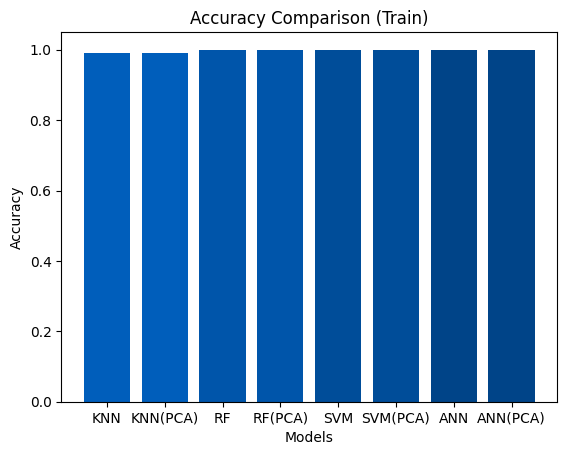

In [160]:
titles = ["KNN", "KNN(PCA)", "RF", "RF(PCA)", "SVM", "SVM(PCA)", "ANN", "ANN(PCA)"]
colors = ["#005EBB", "#005EBB", "#0055AA", "#0055AA", "#004D99", "#004D99", "#004488", "#004488"]

acc_train = [knn_acc_train, knn_acc_train_pca, rf_acc_train, rf_acc_train_pca, svm_acc_train, svm_acc_train_pca, ann_acc_train, ann_acc_train_pca]
plt.bar(titles, acc_train, color=colors)
plt.title('Accuracy Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

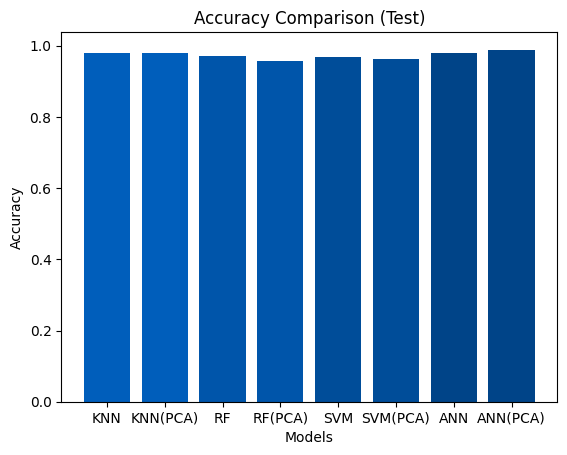

In [161]:
acc_test = [knn_acc_test, knn_acc_test_pca, rf_acc_test, rf_acc_test_pca, svm_acc_test, svm_acc_test_pca, ann_acc_test, ann_acc_test_pca]
plt.bar(titles, acc_test, color=colors)
plt.title('Accuracy Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Accuracy')